In [40]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import yfinance as yf
import copy
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def CAGR(DF):
    "Funcion para calcular Cumulative Annual Growth Rate de una estrategia de trading"
    df = DF.copy()
    df["cum_return"] = (1+df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"]).tolist()[-1]**(1/n) - 1
    return CAGR

In [42]:
def volatility(DF):
    "Funcion para calcular la volatilidad anualizada de una estrategia de trading"
    df =  DF.copy()
    vol = df["mon_ret"].std()* np.sqrt(12)
    return vol

In [43]:
def sharpe(DF, rf):
    "Funcion para calcular Sharpe Ratio; rf es la risk free"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

In [44]:
def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [45]:
tickers = ["MMM","AXP","T","BA","CAT","CSCO","KO", "XOM","GE","GS","HD",
           "IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PFE","PG","TRV",
           "UNH","VZ","V","WMT","DIS"]
ohlc_mon = {} # directory with ohlc value for each stock            
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()

In [46]:
# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1mo')
    ohlc_mon[ticker].dropna(inplace=True,how="all")
 
tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [51]:
#function to calculate portfolio return iteratively
def pflio(DF,m,x):
    """Returns cumulative portfolio return
    DF = dataframe with monthly return info for all stocks
    m = number of stock in the portfolio
    x = number of underperforming stocks to be removed from portfolio monthly"""
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

In [55]:
#calculating overall strategy's KPIs
CAGR(pflio(return_df,6,3))
sharpe(pflio(return_df,6,3),0.025)
max_dd(pflio(return_df,6,3)) 

['JPM', 'MRK', 'UNH', 'MSFT', 'MMM', 'WMT']
['JPM', 'UNH', 'MMM', 'INTC', 'V', 'XOM']
['JPM', 'UNH', 'V', 'MRK', 'CAT', 'MSFT']
['UNH', 'V', 'MRK', 'DIS', 'AXP', 'MRK']
['UNH', 'MRK', 'MRK', 'T', 'MSFT', 'JNJ']
['MRK', 'MRK', 'JNJ', 'TRV', 'KO', 'CAT']
['JNJ', 'TRV', 'KO', 'VZ', 'CSCO', 'UNH']
['JNJ', 'KO', 'UNH', 'INTC', 'CAT', 'GS']
['UNH', 'INTC', 'GS', 'INTC', 'IBM', 'MSFT']
['UNH', 'GS', 'MSFT', 'HD', 'CAT', 'PG']
['GS', 'MSFT', 'PG', 'NKE', 'JNJ', 'GS']
['PG', 'NKE', 'V', 'UNH', 'MMM', 'TRV']
['PG', 'NKE', 'V', 'WMT', 'CSCO', 'INTC']
['PG', 'V', 'CSCO', 'HD', 'JPM', 'GS']
['V', 'CSCO', 'HD', 'BA', 'MRK', 'UNH']
['CSCO', 'HD', 'UNH', 'DIS', 'JPM', 'CSCO']
['HD', 'UNH', 'DIS', 'UNH', 'NKE', 'PFE']
['DIS', 'NKE', 'PFE', 'MSFT', 'GE', 'CAT']
['DIS', 'NKE', 'PFE', 'UNH', 'INTC', 'GS']
['DIS', 'NKE', 'GS', 'NKE', 'DIS', 'JPM']
['NKE', 'NKE', 'V', 'TRV', 'PFE', 'NKE']
['NKE', 'NKE', 'NKE', 'AXP', 'HD', 'VZ']
['NKE', 'NKE', 'NKE', 'NKE', 'INTC', 'MCD']
['INTC', 'MCD', 'MSFT', 'GE', 'TRV'

0.27012750460651863

In [49]:

#calculating KPIs for Index buy and hold strategy over the same period
DJI = yf.download("^DJI",dt.date.today()-dt.timedelta(3650),dt.date.today(),interval='1mo')
DJI["mon_ret"] = DJI["Adj Close"].pct_change().fillna(0)
CAGR(DJI)
sharpe(DJI,0.025)
max_dd(DJI)

[*********************100%%**********************]  1 of 1 completed


0.2320126616506342

['JPM', 'MRK', 'UNH', 'MSFT', 'MMM', 'WMT']
['JPM', 'UNH', 'MMM', 'INTC', 'V', 'XOM']
['JPM', 'UNH', 'V', 'MRK', 'CAT', 'MSFT']
['UNH', 'V', 'MRK', 'DIS', 'AXP', 'MRK']
['UNH', 'MRK', 'MRK', 'T', 'MSFT', 'JNJ']
['MRK', 'MRK', 'JNJ', 'TRV', 'KO', 'CAT']
['JNJ', 'TRV', 'KO', 'VZ', 'CSCO', 'UNH']
['JNJ', 'KO', 'UNH', 'INTC', 'CAT', 'GS']
['UNH', 'INTC', 'GS', 'INTC', 'IBM', 'MSFT']
['UNH', 'GS', 'MSFT', 'HD', 'CAT', 'PG']
['GS', 'MSFT', 'PG', 'NKE', 'JNJ', 'GS']
['PG', 'NKE', 'V', 'UNH', 'MMM', 'TRV']
['PG', 'NKE', 'V', 'WMT', 'CSCO', 'INTC']
['PG', 'V', 'CSCO', 'HD', 'JPM', 'GS']
['V', 'CSCO', 'HD', 'BA', 'MRK', 'UNH']
['CSCO', 'HD', 'UNH', 'DIS', 'JPM', 'CSCO']
['HD', 'UNH', 'DIS', 'UNH', 'NKE', 'PFE']
['DIS', 'NKE', 'PFE', 'MSFT', 'GE', 'CAT']
['DIS', 'NKE', 'PFE', 'UNH', 'INTC', 'GS']
['DIS', 'NKE', 'GS', 'NKE', 'DIS', 'JPM']
['NKE', 'NKE', 'V', 'TRV', 'PFE', 'NKE']
['NKE', 'NKE', 'NKE', 'AXP', 'HD', 'VZ']
['NKE', 'NKE', 'NKE', 'NKE', 'INTC', 'MCD']
['INTC', 'MCD', 'MSFT', 'GE', 'TRV'

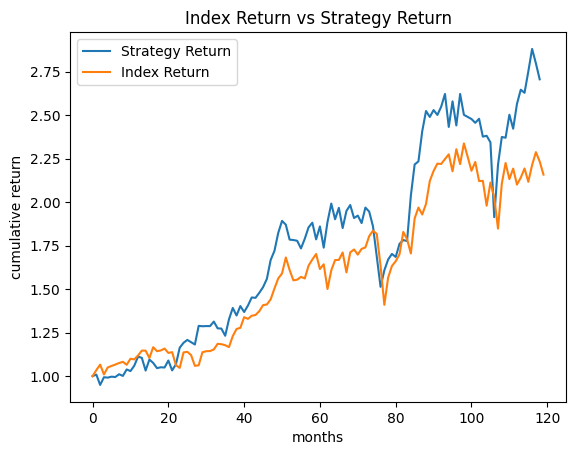

In [50]:
#visualization
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])